# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

# Part 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

### Exploring data

In [5]:
ds = 'Mobile_Price_Data.csv'
df = pd.read_csv(ds)

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,...,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,1999.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.035018,0.501601,140.249000,4.520500,...,645.108000,1251.566783,2124.218609,12.306500,5.767000,11.011000,0.761381,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.142986,0.288411,35.399655,2.287837,...,443.780811,432.301505,1085.003435,4.213245,4.356398,5.463955,0.426346,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Cleaning Data

In [8]:
df = df.dropna()

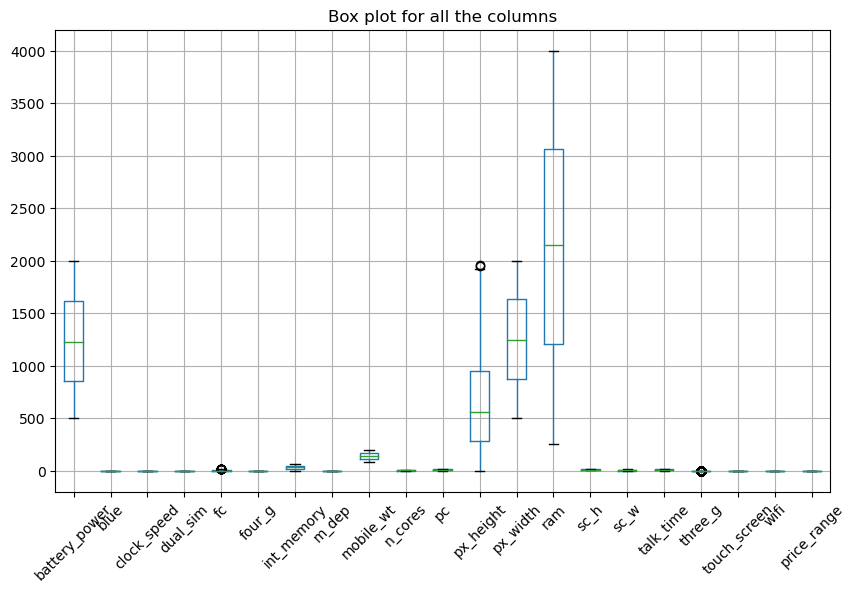

In [9]:
# Finding outliers
plt.figure(figsize=(10, 6))  

df.boxplot(widths=0.5)  

# Adding title and rotating x-axis labels
plt.title("Box plot for all the columns")
plt.xticks(rotation=45)

plt.show()

Text(0.5, 1.0, 'Box plot for Three G')

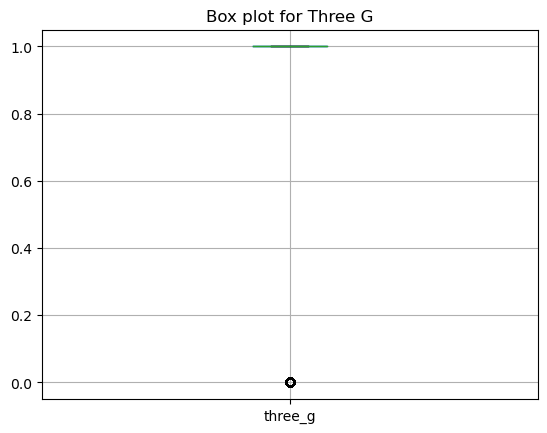

In [10]:
df[["three_g"]].boxplot()
plt.title("Box plot for Three G")

In [11]:
df1 = df.drop(df.index[
    (df['px_height'] > df['px_height']. median () + 1380) |
    (df['three_g'] != df['three_g']. median ()) |
    (df['fc'] > df['fc']. median () + 2)
])

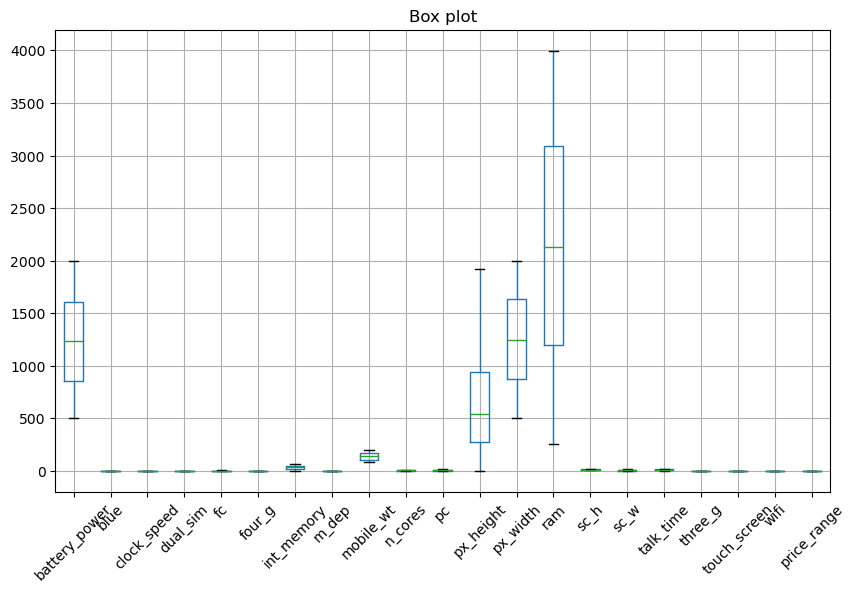

In [12]:
plt.figure(figsize=(10, 6))  

df1.boxplot(widths=0.5)  

# Adding title and rotating x-axis labels
plt.title("Box plot")
plt.xticks(rotation=45)

plt.show()

# Part 2

### Correlation

In [13]:
df1.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.008497,-0.024266,-0.099421,0.071482,0.033444,-0.005737,0.059221,-0.007840,-0.023707,...,0.014017,-0.034882,-0.025928,-0.056828,-0.036148,0.009142,NaN,-0.039870,-0.065841,0.167929
blue,-0.008497,1.000000,0.006602,0.013080,-0.004048,0.037118,0.059156,0.028464,-0.038335,0.044318,...,-0.035580,-0.027523,0.015957,0.013188,0.034671,0.018470,NaN,-0.001527,0.009954,0.008746
clock_speed,-0.024266,0.006602,1.000000,-0.008811,-0.001120,-0.020894,0.041896,0.002119,0.001000,0.011505,...,-0.037300,-0.039485,-0.007037,-0.072074,0.011487,-0.007285,NaN,-0.016162,-0.028160,-0.042261
dual_sim,-0.099421,0.013080,-0.008811,1.000000,-0.053115,0.030276,-0.036813,-0.019164,-0.023838,-0.009876,...,-0.045465,0.022902,0.031056,-0.011356,-0.018017,-0.032175,NaN,0.001367,0.052532,-0.001814
fc,0.071482,-0.004048,-0.001120,-0.053115,1.000000,0.050140,-0.015110,0.032630,0.036131,-0.045000,...,-0.048463,-0.033858,0.029971,-0.002125,-0.005772,0.004894,NaN,-0.021584,0.006650,0.026555
four_g,0.033444,0.037118,-0.020894,0.030276,0.050140,1.000000,0.018934,0.014519,-0.019099,-0.042868,...,-0.003463,0.017458,-0.014303,0.026977,0.056581,0.000801,NaN,0.023868,-0.028138,-0.001707
int_memory,-0.005737,0.059156,0.041896,-0.036813,-0.015110,0.018934,1.000000,0.027992,-0.015452,-0.018780,...,-0.046590,-0.025372,0.031003,0.012150,0.033915,-0.025361,NaN,-0.040744,0.037130,0.039434
m_dep,0.059221,0.028464,0.002119,-0.019164,0.032630,0.014519,0.027992,1.000000,0.009125,-0.004220,...,0.024117,0.019417,0.009232,-0.030485,-0.032569,0.013527,NaN,-0.014032,-0.033521,0.020562
mobile_wt,-0.007840,-0.038335,0.001000,-0.023838,0.036131,-0.019099,-0.015452,0.009125,1.000000,-0.036448,...,0.028062,0.039677,0.019270,-0.053298,-0.008868,-0.002671,NaN,-0.024436,-0.021782,-0.001134
n_cores,-0.023707,0.044318,0.011505,-0.009876,-0.045000,-0.042868,-0.018780,-0.004220,-0.036448,1.000000,...,-0.002274,0.022372,0.026070,0.025425,0.052512,0.006497,NaN,0.024488,-0.018611,0.018800


In [14]:
# The most correlated ones are those with 1/-1 correlation rate. 
# So in this dataset, ram and battery power are the most helpful factors with predicting the price.

# Part 3

### Spliting 

In [15]:
train, test = train_test_split(df1, test_size=0.2, random_state=142)

X_train = train[['ram','battery_power']]
y_train = train['price_range']

X_test = test[['ram','battery_power']]
y_test = test['price_range']

# Part 4

### Train a logistic regression model

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction_test = logreg.predict(X_test)
prediction_train = logreg.predict(X_train)

In [17]:
acc_test = accuracy_score(y_test, prediction_test)
acc_train = accuracy_score(y_train, prediction_train)
print(f'Accuracy Score of Test Set: {acc_test}')
print(f'Accuracy Score of Train Set: {acc_train}')

Accuracy Score of Test Set: 0.7902439024390244
Accuracy Score of Train Set: 0.8278388278388278


In [18]:
# As we can see in this regression model, the accuracy score for both train and test are high and close to each other.
# So we can tell this model is performing well.
# 

# Part 5

### Train KNN Model

In [19]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    prediction_Test = knn.predict(X_test)
    prediction_Train = knn.predict(X_train)
    acc_Test = accuracy_score(y_test, prediction_Test)
    acc_Train = accuracy_score(y_train, prediction_Train)
    print(f'Accuracy Score of Test Set: {acc_Test}')
    print(f'Accuracy Score of Train Set: {acc_Train}')

Accuracy Score of Test Set: 0.7463414634146341
Accuracy Score of Train Set: 0.8766788766788767


In [20]:
# Based on calculation of accuracy score, they are both high and near to 1 so it means the model is performing well.
# However, training accuracy is a bit more than test accurracy so it might suggest overlifting.

# Part 6

### Tune the hyper-parameter K

In [21]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    param_grid = {'n_neighbors': list(range(1,100))}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_hp = grid_search.best_params_['n_neighbors']
    print(f'Best Hyperparameters: {best_hp}')

Best Hyperparameters: 19


In [22]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    best_model = KNeighborsClassifier(best_hp)
    best_model.fit(X_train, y_train)
    prediction = best_model.predict(X_test)
    acc = accuracy_score(y_test, prediction)
    print(f'Best Accuracy: {acc}')

Best Accuracy: 0.7951219512195122


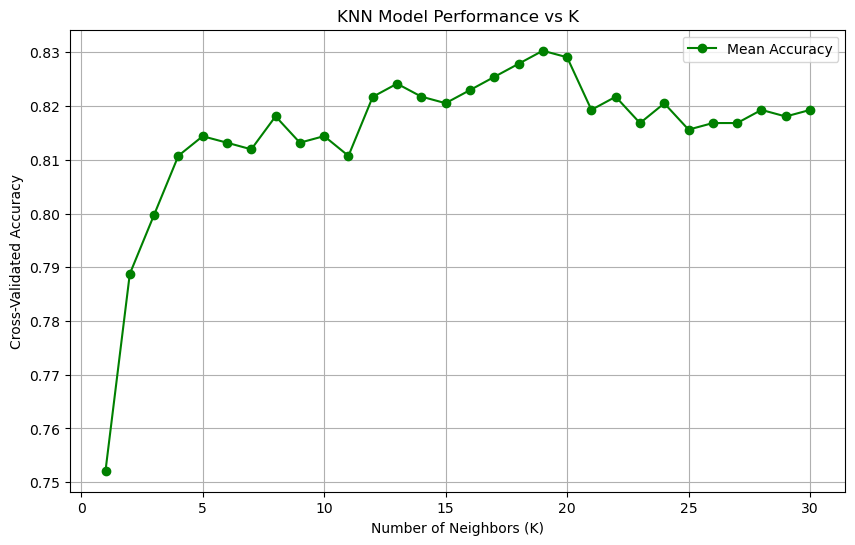

In [32]:
import matplotlib.pyplot as plt

# Extracting mean test scores
test_scores = grid_search.cv_results_['mean_test_score']

# Extracting K values (number of neighbors)
k_values = range(1, 31)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_scores, marker='o', linestyle='-', color='g', label='Mean Accuracy')
plt.title('KNN Model Performance vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# It is crucial to pick the right K. 
# If you choose the small K (Small values), it will result in overlifting (performs poorly on unseen data)
# If you choose the large K (High values), it will result in underlfting (considers too many irrelevant neighbors)
# If you choose moderate K, it will Aim to maximize prediction accuracy by minimizing both overfitting and underfitting.